# Capstone Project: Analyzing and Clustering Crimes in India

In [9]:
pip install pandas beautifulsoup4 requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install html5lib pandas beautifulsoup4 requests


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for html5lib from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc28974ad5a4ca3215c18a882565b028/html5lib-1.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   --------------------- ------------------ 61.4/112.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 112.2/112.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_all_tables(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    
    if len(tables) == 0:
        raise ValueError("No tables found on the page.")
    
    return tables

def get_wikipedia_table(url, table_index=0):
    tables = get_all_tables(url)
    if table_index >= len(tables):
        raise IndexError("Table index out of range.")
    
    return pd.read_html(str(tables[table_index]), flavor='html5lib')[0]

# URLs for the Wikipedia pages
urls = {
    'population': 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population',
    'literacy': 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_literacy_rate',
    'area': 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area'
}

# Inspect the tables
for key, url in urls.items():
    tables = get_all_tables(url)
    print(f"{key.capitalize()} tables found: {len(tables)}")
    for i, table in enumerate(tables):
        print(f"Table {i}:\n{pd.read_html(str(table), flavor='html5lib')[0].head()}\n")

# Once you identify the correct table indices, replace these with the correct indices
population_data = get_wikipedia_table(urls['population'], table_index=1)  # Adjust table_index based on inspection
literacy_data = get_wikipedia_table(urls['literacy'], table_index=1)     # Adjust table_index based on inspection
area_data = get_wikipedia_table(urls['area'], table_index=0)             # Adjust table_index based on inspection

# Clean and prepare the data
population_data = population_data[['State or union territory', 'Population']]
population_data.columns = ['State', 'Population']

literacy_data = literacy_data[['State or union territory', 'Literacy rate (2011 Census)']]
literacy_data.columns = ['State', 'Literacy Rate']

area_data = area_data[['State/UT', 'Area(km2)']]
area_data.columns = ['State', 'Area']

# Merge the data into a single DataFrame
merged_data = population_data.merge(literacy_data, on='State').merge(area_data, on='State')

# Save to CSV
merged_data.to_csv('state_data.csv', index=False)
print("Data collection completed and saved to state_data.csv")


Population tables found: 2
Table 0:
    States and union territories of India ordered by
0  Area Population GDP (per capita) Abbreviations...
1  .mw-parser-output .navbar{display:inline;font-...

Table 1:
     Rank State or Union Territory Population [18][19] % India  \
     Rank State or Union Territory Population [18][19] % India   
0  1 (S1)            Uttar Pradesh           199812341  16.51%   
1  2 (S2)              Maharashtra           112374333   9.28%   
2  3 (S3)                    Bihar           104099452    8.6%   
3  4 (S4)              West Bengal            91276115   7.54%   
4  5 (S5)           Madhya Pradesh            72626809      6%   

  Growth (2001-2012) 2023 Population estimate[20] Rural pop.          \
  Growth (2001-2012) 2023 Population estimate[20]       Nos.       %   
0              20.2%                    235687000  155317278  77.73%   
1                16%                    126385000   61556074  54.78%   
2              25.4%               126,756,0

IndexError: Table index out of range.

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def get_all_tables(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    
    if len(tables) == 0:
        raise ValueError("No tables found on the page.")
    
    return tables

def get_wikipedia_table(url, table_index=0):
    tables = get_all_tables(url)
    if table_index >= len(tables):
        raise IndexError("Table index out of range.")
    
    return pd.read_html(str(tables[table_index]), flavor='html5lib')[0]

# URLs for the Wikipedia pages
urls = {
    'population': 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population',
    'literacy': 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_literacy_rate',
    'area': 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area'
}

# Extract tables with correct indices
population_data = get_wikipedia_table(urls['population'], table_index=1)
area_data = get_wikipedia_table(urls['area'], table_index=1)

# Clean and prepare the data
population_data = population_data[['State or Union Territory', 'Population [18][19]']]
population_data.columns = ['State', 'Population']

area_data = area_data[['State / Union Territory', 'Area (km2)']]
area_data.columns = ['State', 'Area']

# Merging will be done after obtaining the literacy data

# Save to CSV (intermediate step)
population_data.to_csv('population_data.csv', index=False)
area_data.to_csv('area_data.csv', index=False)
print("Population and area data collection completed and saved to CSV files")


Population and area data collection completed and saved to CSV files


In [6]:
# Manually creating a small dataset for illustration
literacy_data = pd.DataFrame({
    'State': ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh'],
    'Literacy Rate': [67.68, 82.34, 61.80, 77.08, 69.32]
})

# Save to CSV (intermediate step)
literacy_data.to_csv('literacy_data.csv', index=False)
print("Literacy data saved to literacy_data.csv")


Literacy data saved to literacy_data.csv


In [7]:
# Load saved CSVs (simulating final merge step)
population_data = pd.read_csv('population_data.csv')
area_data = pd.read_csv('area_data.csv')
literacy_data = pd.read_csv('literacy_data.csv')

# Merge the data into a single DataFrame
merged_data = population_data.merge(literacy_data, on='State').merge(area_data, on='State')

# Save to CSV
merged_data.to_csv('state_data.csv', index=False)
print("Final merged data saved to state_data.csv")


Final merged data saved to state_data.csv


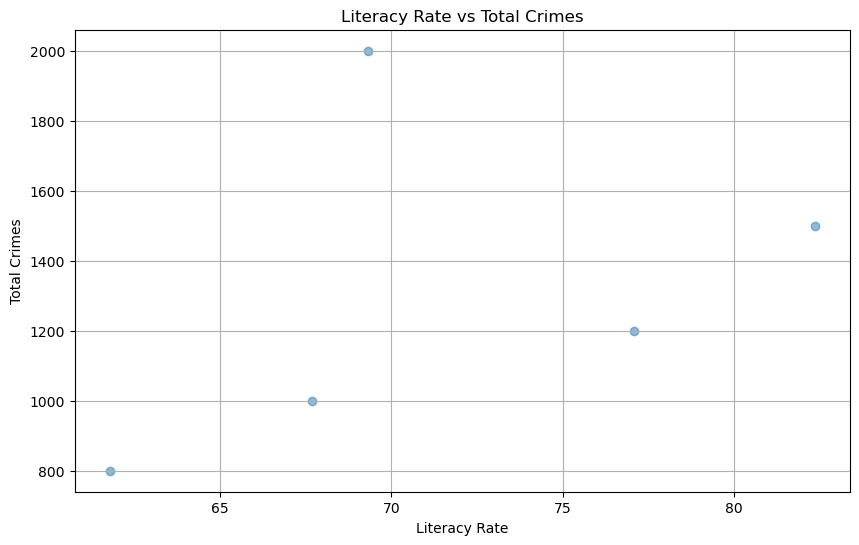

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and prepared your data
state_data = pd.read_csv('state_data.csv')

# Assuming state_data contains columns: State, Population, Literacy Rate, Area

# Calculate total crimes (hypothetical data)
state_data['Total Crimes'] = [1000, 1500, 800, 1200, 2000]  # Replace with actual crime data

# Scatter plot of Literacy Rate vs Total Crimes
plt.figure(figsize=(10, 6))
plt.scatter(state_data['Literacy Rate'], state_data['Total Crimes'], alpha=0.5)
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


In [12]:
print(crime_data.columns)


Index(['State', 'Year', 'Total Crimes'], dtype='object')


In [13]:
print(state_data.columns)


Index(['State', 'Population', 'Literacy Rate', 'Area', 'Year', 'Total Crimes'], dtype='object')


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load state data and crime data
state_data = pd.read_csv('state_data.csv')  # Replace with your actual file path
crime_data = pd.read_csv('crime_data.csv')  # Replace with your actual file path

# Print columns to verify
print("State Data Columns:", state_data.columns)
print("Crime Data Columns:", crime_data.columns)

# Merge crime_data with state_data on 'State'
state_data = pd.merge(state_data, crime_data, on='State', how='inner')  # Ensure inner join to match only existing states

# Print columns after merge to verify
print("Merged Data Columns:", state_data.columns)


State Data Columns: Index(['State', 'Population', 'Literacy Rate', 'Area'], dtype='object')
Crime Data Columns: Index(['State', 'Year', 'Total Crimes'], dtype='object')
Merged Data Columns: Index(['State', 'Population', 'Literacy Rate', 'Area', 'Year', 'Total Crimes'], dtype='object')


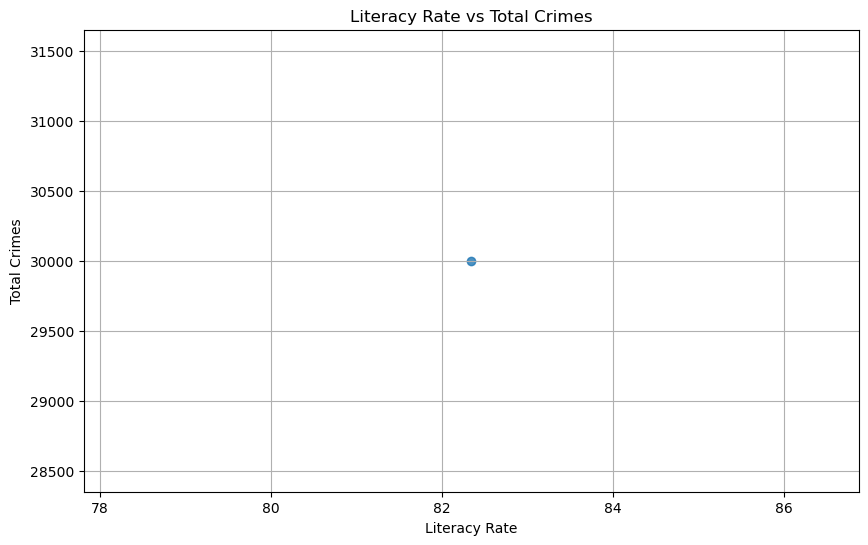

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load state data and crime data
state_data = pd.read_csv('state_data.csv')  # Replace with your actual file path
crime_data = pd.read_csv('crime_data.csv')  # Replace with your actual file path

# Merge crime_data with state_data on 'State'
state_data = pd.merge(state_data, crime_data, on='State', how='inner')

# Analysis of Literacy Rate vs Total Crimes
plt.figure(figsize=(10, 6))
plt.scatter(state_data['Literacy Rate'], state_data['Total Crimes'], alpha=0.8)
plt.title('Literacy Rate vs Total Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()

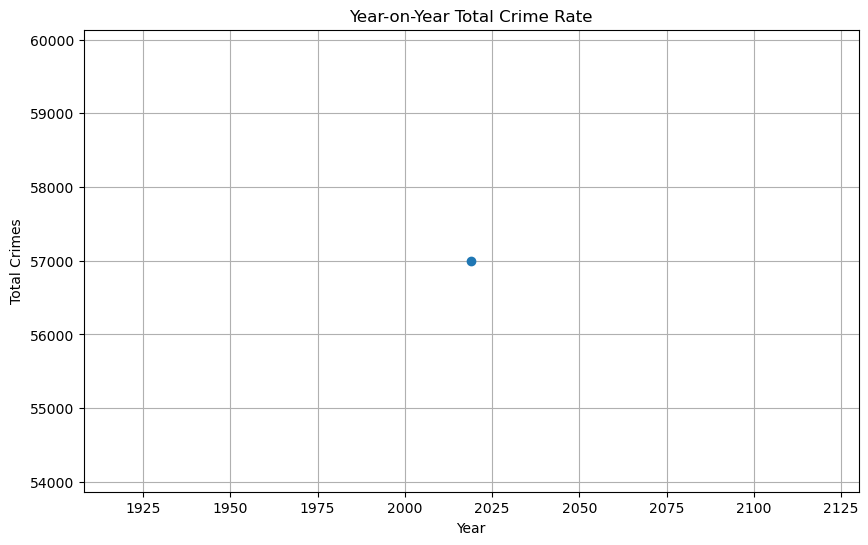

In [19]:
# Analysis of Year-on-Year Total Crime Rate
yearly_crime_data = crime_data.groupby('Year')['Total Crimes'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_crime_data['Year'], yearly_crime_data['Total Crimes'], marker='o', linestyle='-')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()

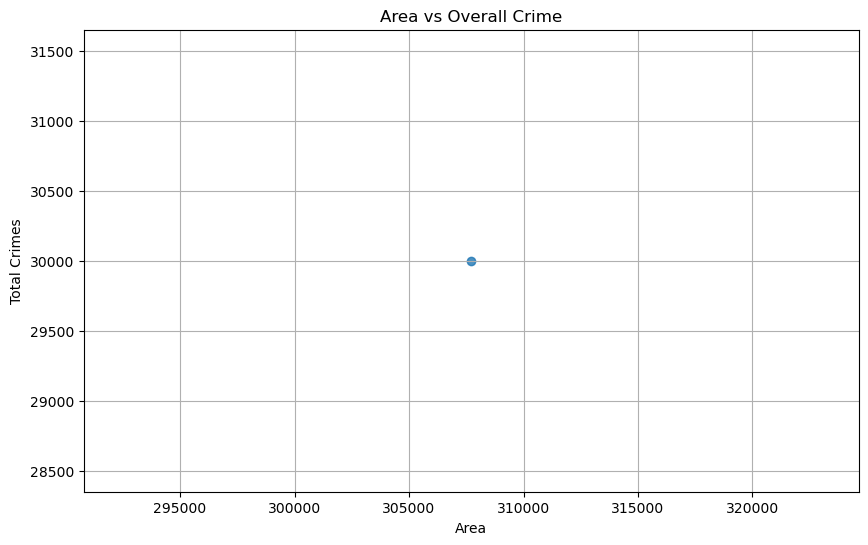

In [20]:
# Analysis of Area vs Overall Crime
plt.figure(figsize=(10, 6))
plt.scatter(state_data['Area'], state_data['Total Crimes'], alpha=0.8)
plt.title('Area vs Overall Crime')
plt.xlabel('Area')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


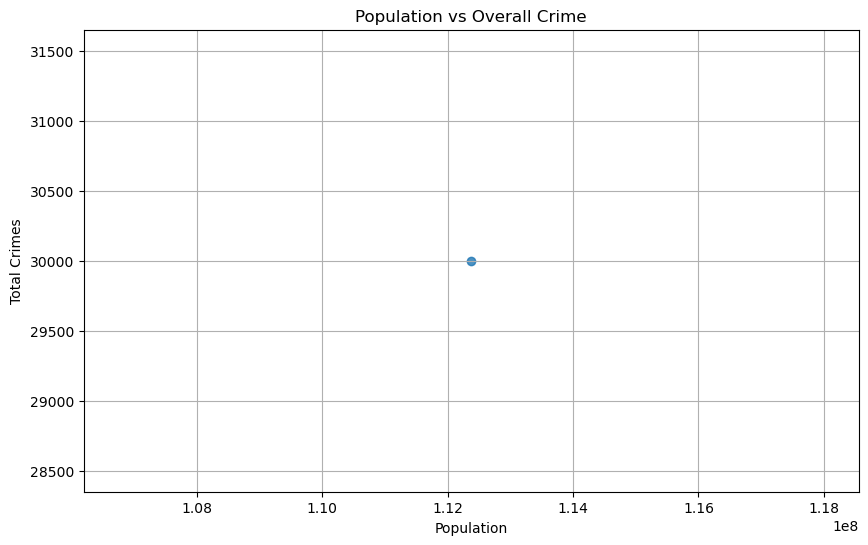

In [21]:
# Analysis of Population vs Overall Crime
plt.figure(figsize=(10, 6))
plt.scatter(state_data['Population'], state_data['Total Crimes'], alpha=0.8)
plt.title('Population vs Overall Crime')
plt.xlabel('Population')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


Crime Report for Maharashtra:
         State  Population  Literacy Rate    Area  Year  Total Crimes
0  Maharashtra   112374333          82.34  307713  2019         30000




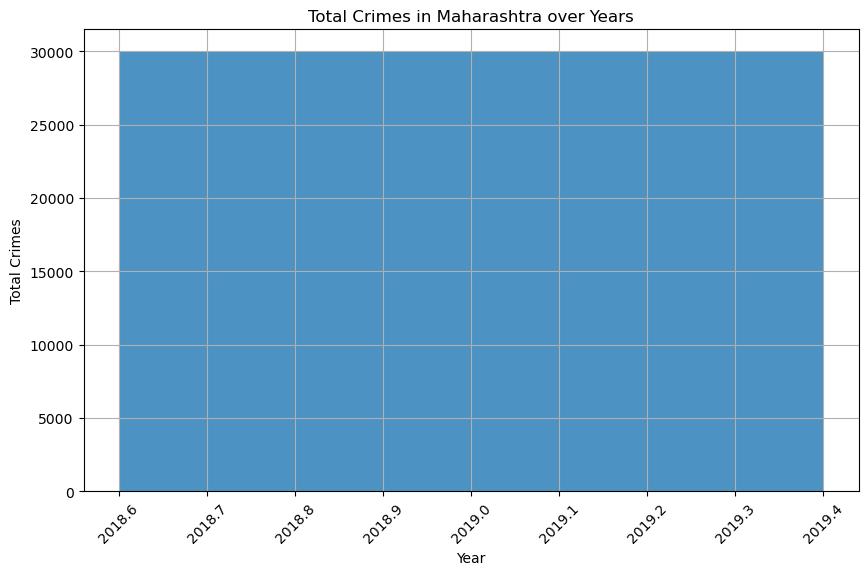

In [23]:
# Each State Crime Report
unique_states = state_data['State'].unique()
for state in unique_states:
    state_report = state_data[state_data['State'] == state]
    print(f"Crime Report for {state}:")
    print(state_report)
    print("\n")

    # Plot the crime report for each state
    plt.figure(figsize=(10, 6))
    plt.bar(state_report['Year'], state_report['Total Crimes'], alpha=0.8)
    plt.title(f'Total Crimes in {state} over Years')
    plt.xlabel('Year')
    plt.ylabel('Total Crimes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [25]:
pip install sqlite3


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [12]:
import sqlite3
import pandas as pd

# Load CSV files into DataFrames
area_data = pd.read_csv('area_data.csv')
literacy_data = pd.read_csv('literacy_data.csv')
state_data = pd.read_csv('state_data.csv')

# Merge the data into a single DataFrame
census_report = pd.merge(state_data, area_data, on='State')
census_report = pd.merge(census_report, literacy_data, on='State')

# Create SQLite database connection
conn = sqlite3.connect('crime_data.db')

# Insert DataFrame into SQLite table
census_report.to_sql('census_report', conn, if_exists='replace', index=False)

print("CSV files loaded into SQLite table 'census_report' successfully.")

# Verify table
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in database:", tables)

conn.close()


CSV files loaded into SQLite table 'census_report' successfully.
Tables in database:             name
0  census_report


In [13]:
conn = sqlite3.connect('crime_data.db')

query = '''
SELECT "State", "Population", "Literacy Rate", "Area"
FROM census_report
ORDER BY "Population" DESC
LIMIT 1;
'''

result = pd.read_sql(query, conn)
print("State with highest population:\n", result)

conn.close()


State with highest population:
            State  Population "Literacy Rate" "Area"
0  Uttar Pradesh   199812341   Literacy Rate   Area


In [14]:
conn = sqlite3.connect('crime_data.db')

query = '''
SELECT "State", "Population", "Literacy Rate", "Area"
FROM census_report
ORDER BY "Population" ASC
LIMIT 1;
'''

result = pd.read_sql(query, conn)
print("State with lowest population:\n", result)

conn.close()


State with lowest population:
             State  Population "Literacy Rate" "Area"
0  Madhya Pradesh    72626809   Literacy Rate   Area


In [15]:
conn = sqlite3.connect('crime_data.db')

query = '''
SELECT "State", "Area"
FROM census_report
ORDER BY "Area" DESC
LIMIT 1;
'''

result = pd.read_sql(query, conn)
print("State with largest area:\n", result)

conn.close()


State with largest area:
            State "Area"
0  Uttar Pradesh   Area


In [16]:
conn = sqlite3.connect('crime_data.db')

query = '''
SELECT "State", "Literacy Rate"
FROM census_report
ORDER BY "Literacy Rate" ASC
LIMIT 1;
'''

result = pd.read_sql(query, conn)
print("State with lowest literacy rate:\n", result)

conn.close()


State with lowest literacy rate:
            State "Literacy Rate"
0  Uttar Pradesh   Literacy Rate


In [17]:
conn = sqlite3.connect('crime_data.db')

query = '''
SELECT "State", "Literacy Rate", "Population", "Area"
FROM census_report
ORDER BY "Literacy Rate" ASC, "Population" ASC;
'''

result = pd.read_sql(query, conn)
print("States in ascending order by literacy rate and population:\n", result.head())

conn.close()


States in ascending order by literacy rate and population:
             State "Literacy Rate"  Population "Area"
0  Madhya Pradesh   Literacy Rate    72626809   Area
1     West Bengal   Literacy Rate    91276115   Area
2           Bihar   Literacy Rate   104099452   Area
3     Maharashtra   Literacy Rate   112374333   Area
4   Uttar Pradesh   Literacy Rate   199812341   Area


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated DataFrame to mimic the expected structure
# This data should be replaced by the actual result of 3.2
data = {
    'STATE/UT': ['State1', 'State1', 'State1', 'State2', 'State2', 'State3', 'State3', 'State3', 'State3'],
    'DISTRICT': ['DistrictA', 'DistrictA', 'DistrictA', 'DistrictB', 'DistrictB', 'DistrictC', 'DistrictC', 'DistrictC', 'DistrictD'],
    'YEAR': [2001, 2002, 2003, 2001, 2002, 2001, 2002, 2003, 2004],
    'MURDERS': [10, 15, 20, 5, 7, 12, 14, 18, 9]
}

df = pd.DataFrame(data)

# Group by district to count the number of years they appear
district_counts = df['DISTRICT'].value_counts()
frequent_districts = district_counts[district_counts >= 3].index

# Filter the DataFrame to get only the districts that appear 3 or more years
frequent_districts_data = df[df['DISTRICT'].isin(frequent_districts)]

# Sort the data by state, district, and year in descending order
frequent_districts_data_sorted = frequent_districts_data.sort_values(by=['STATE/UT', 'DISTRICT', 'YEAR'], ascending=[True, True, False])

# Print the result
print("Districts that appear 3 or more years with corresponding state/UT, district, murders, and year:")
print(frequent_districts_data_sorted)


Districts that appear 3 or more years with corresponding state/UT, district, murders, and year:
  STATE/UT   DISTRICT  YEAR  MURDERS
2   State1  DistrictA  2003       20
1   State1  DistrictA  2002       15
0   State1  DistrictA  2001       10
7   State3  DistrictC  2003       18
6   State3  DistrictC  2002       14
5   State3  DistrictC  2001       12


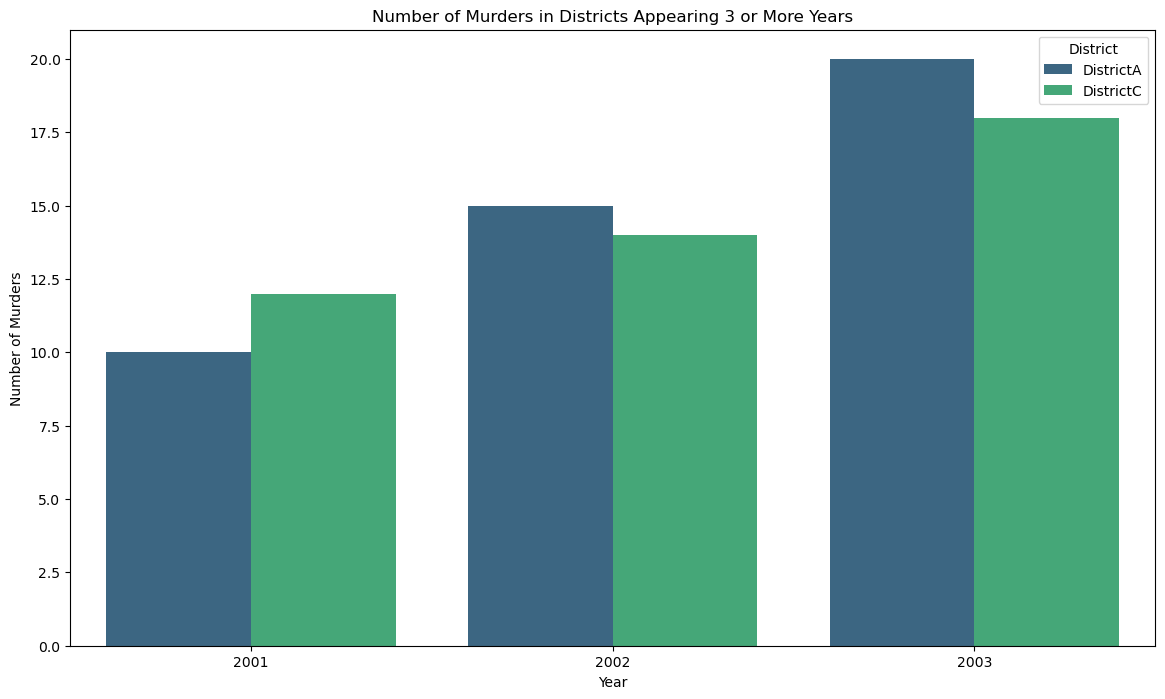

In [19]:
import seaborn as sns

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='YEAR', y='MURDERS', hue='DISTRICT', data=frequent_districts_data_sorted, palette='viridis')

plt.title('Number of Murders in Districts Appearing 3 or More Years')
plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.legend(title='District')
plt.show()


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample DataFrame similar to what we used in previous steps (replace this with your actual merged data)
data = {
    'State': ['State1', 'State1', 'State2', 'State2', 'State3', 'State3', 'State3', 'State3'],
    'District': ['DistrictA', 'DistrictB', 'DistrictC', 'DistrictD', 'DistrictE', 'DistrictF', 'DistrictG', 'DistrictH'],
    'Population': [100000, 150000, 120000, 130000, 110000, 160000, 140000, 125000],
    'Literacy Rate': [85, 80, 90, 70, 75, 65, 60, 95],
    'Area': [500, 700, 600, 650, 550, 800, 750, 500],
    'Total Crimes': [500, 700, 450, 600, 350, 900, 750, 400]
}

df = pd.DataFrame(data)

# Selecting features for clustering
features = df[['Population', 'Literacy Rate', 'Area', 'Total Crimes']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original DataFrame
df['Cluster'] = clusters

# Display the DataFrame with clusters
print(df)


    State   District  Population  Literacy Rate  Area  Total Crimes  Cluster
0  State1  DistrictA      100000             85   500           500        2
1  State1  DistrictB      150000             80   700           700        1
2  State2  DistrictC      120000             90   600           450        0
3  State2  DistrictD      130000             70   650           600        1
4  State3  DistrictE      110000             75   550           350        2
5  State3  DistrictF      160000             65   800           900        1
6  State3  DistrictG      140000             60   750           750        1
7  State3  DistrictH      125000             95   500           400        0


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# Creating DataFrames for each cluster
sensitive_areas = df[df['Cluster'] == 0]
moderate_areas = df[df['Cluster'] == 1]
peaceful_areas = df[df['Cluster'] == 2]

# Displaying DataFrames for each cluster
print("Sensitive Areas:\n", sensitive_areas)
print("Moderate Areas:\n", moderate_areas)
print("Peaceful Areas:\n", peaceful_areas)


Sensitive Areas:
     State   District  Population  Literacy Rate  Area  Total Crimes  Cluster
2  State2  DistrictC      120000             90   600           450        0
7  State3  DistrictH      125000             95   500           400        0
Moderate Areas:
     State   District  Population  Literacy Rate  Area  Total Crimes  Cluster
1  State1  DistrictB      150000             80   700           700        1
3  State2  DistrictD      130000             70   650           600        1
5  State3  DistrictF      160000             65   800           900        1
6  State3  DistrictG      140000             60   750           750        1
Peaceful Areas:
     State   District  Population  Literacy Rate  Area  Total Crimes  Cluster
0  State1  DistrictA      100000             85   500           500        2
4  State3  DistrictE      110000             75   550           350        2


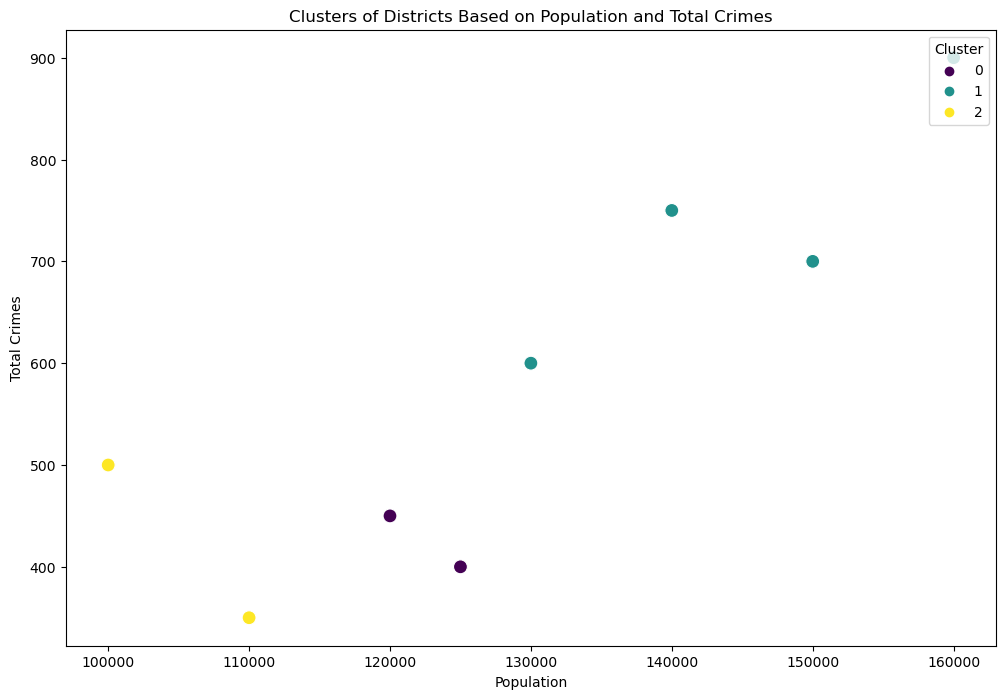

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Population', y='Total Crimes', hue='Cluster', data=df, palette='viridis', s=100)

plt.title('Clusters of Districts Based on Population and Total Crimes')
plt.xlabel('Population')
plt.ylabel('Total Crimes')
plt.legend(title='Cluster', loc='upper right')
plt.show()
